<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-01 12:59:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.3’

survey-results-publ 100%[===================>] 201.62M  59.1MB/s    in 3.4s    

2025-06-01 12:59:21 (59.2 MB/s) - ‘survey-results-public.sqlite.3’ saved [211415040/211415040]



#### 2. Connect to the Database


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


#### Demo 3: Group Data by Age


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [7]:
QUERY = """ SELECT * FROM main """
data = pd.read_sql_query(QUERY,conn)

In [8]:
df = data.copy()

In [9]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

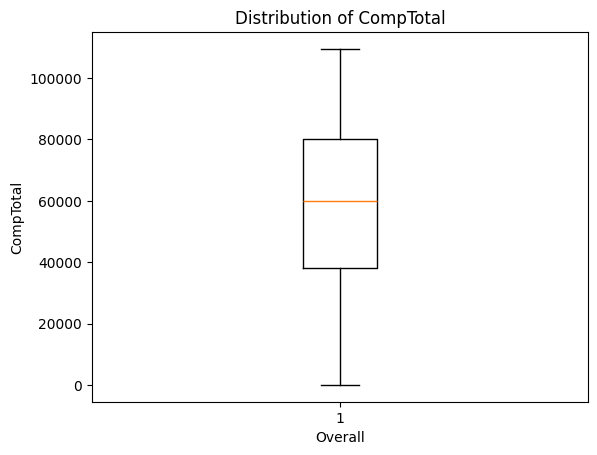

In [10]:
cols = ['CompTotal']
df_box = df[cols].dropna().reset_index(drop=True)
df_box = df_box[df_box['CompTotal'] < df_box['CompTotal'].median()] # remove outlier

plt.boxplot(df_box)
plt.title('Distribution of CompTotal')
plt.xlabel('Overall')
plt.ylabel('CompTotal')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [11]:
# Map age range to its median (cap at 10 and 70)
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

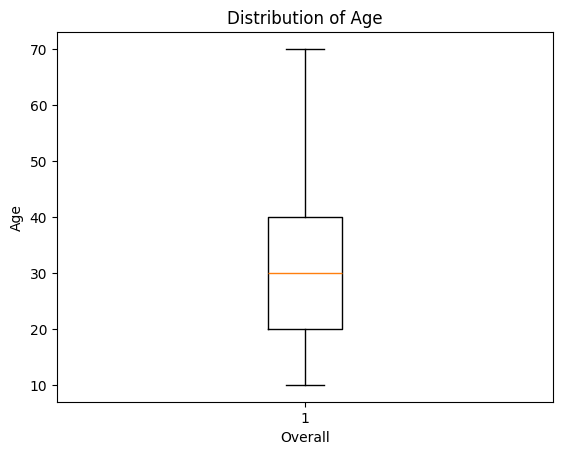

In [12]:
cols = ['Age_Median']
df_box = df[cols].dropna().reset_index(drop=True)

plt.boxplot(df_box['Age_Median'])
plt.title('Distribution of Age')
plt.xlabel('Overall')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


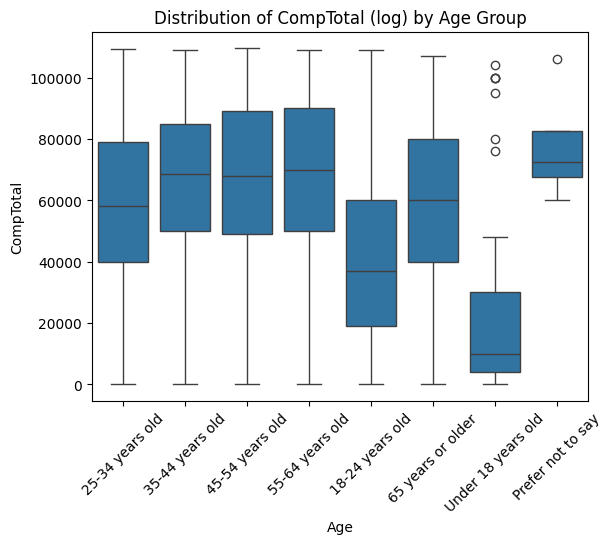

In [13]:
cols = ['CompTotal', 'Age']
df_box = df[cols].dropna().reset_index(drop=True)
df_box = df_box[df_box['CompTotal'] < df_box['CompTotal'].median()] # remove outlier

sns.boxplot(x='Age', y='CompTotal', data=df_box)
plt.title('Distribution of CompTotal (log) by Age Group')
plt.xlabel('Age')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [14]:
df['JobSatPoints_6'].unique()

array([   nan,   0.  ,  25.  ,  30.  ,  60.  , 100.  ,  20.  ,  50.  ,
        15.  ,  10.  ,   5.  ,  80.  ,   8.  ,  65.  ,  90.  ,  75.  ,
        35.  ,  40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,
         9.  ,  21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,
        78.  ,  85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,
        81.  ,   6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,
        89.  ,  99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,
        88.  ,  29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,
        26.  ,  98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,
        43.  ,  69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,
        97.  ,  96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,
        51.  ,  48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

In [15]:
df['JobSatPoints_6_Level'].unique()

array([nan, 'Very Low (0–14)', 'Low (15–29)', 'Fair (30–44)',
       'High (60–74)', 'Extremely High (90+)', 'Moderate (45–59)',
       'Very High (75–89)'], dtype=object)

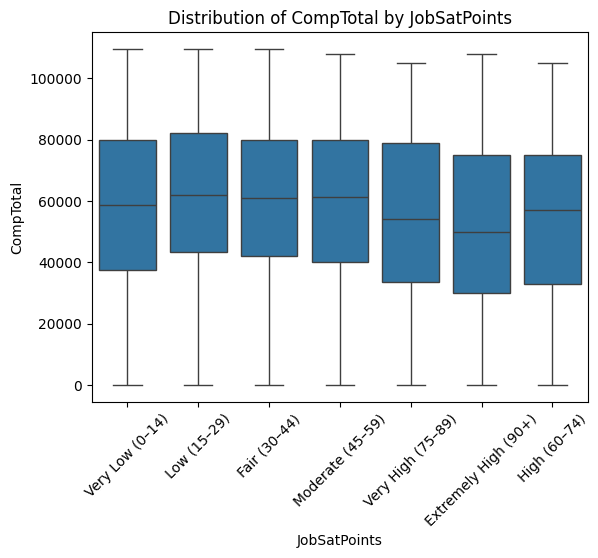

In [16]:
cols = ['CompTotal', 'JobSatPoints_6_Level']
df_box = df[cols].dropna().reset_index(drop=True)
df_box = df_box[df_box['CompTotal'] < df_box['CompTotal'].median()] # remove outlier

sns.boxplot(x='JobSatPoints_6_Level', y='CompTotal', data=df_box)
plt.title('Distribution of CompTotal by JobSatPoints')
plt.xlabel('JobSatPoints')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [17]:
top_dev = df['DevType'].value_counts().head(5).index.tolist()
top_dev

['Developer, full-stack',
 'Developer, back-end',
 'Student',
 'Developer, front-end',
 'Developer, desktop or enterprise applications']

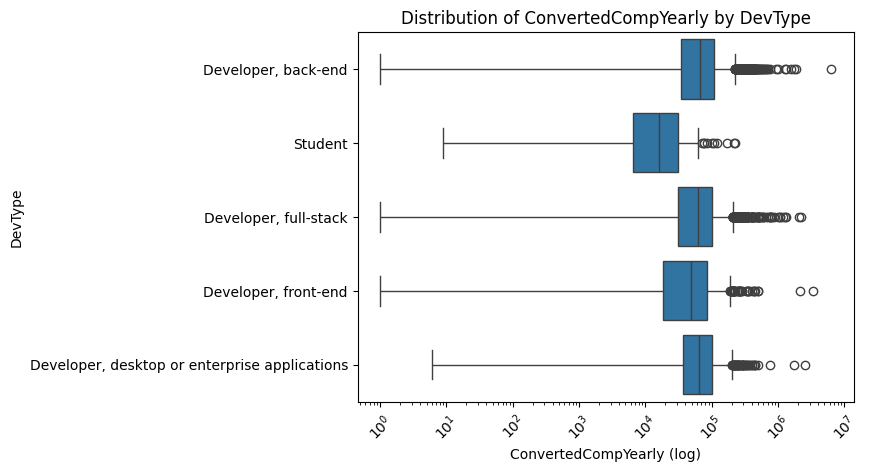

In [18]:
cols = ['ConvertedCompYearly', 'DevType']
df_box = df[df['DevType'].isin(top_dev)] # filter top 5 dev types
df_box = df_box[cols].dropna().reset_index(drop=True)

sns.boxplot(x='ConvertedCompYearly', y='DevType', data=df_box)
plt.title('Distribution of ConvertedCompYearly by DevType')
plt.xlabel('ConvertedCompYearly (log)')
plt.ylabel('DevType')
plt.xticks(rotation=45)
plt.xscale('log')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [19]:
top_countries = df['Country'].value_counts().head(5).index.tolist()
top_countries

['USA', 'Germany', 'India', 'UK', 'Ukraine']

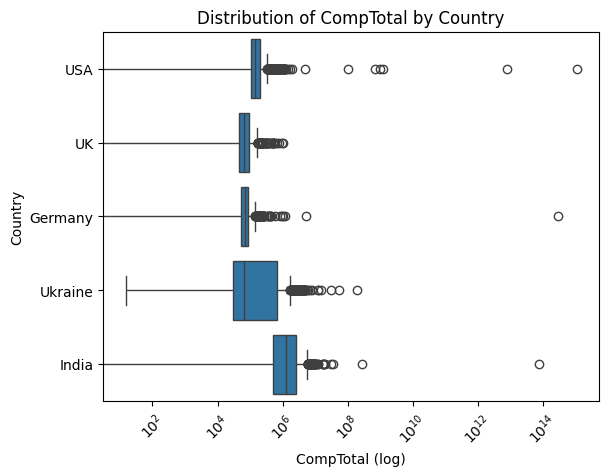

In [20]:
cols = ['CompTotal', 'Country']
df_box = df[df['Country'].isin(top_countries)] # filter top 5 dev types
df_box = df_box[cols].dropna().reset_index(drop=True)

sns.boxplot(x='CompTotal', y='Country', data=df_box)
plt.title('Distribution of CompTotal by Country')
plt.xlabel('CompTotal (log)')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.xscale('log')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [21]:
top_emp = df['Employment'].value_counts().head(5).index.tolist()
top_emp

['Employed, full-time',
 'Independent contractor, freelancer, or self-employed',
 'Student, full-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Not employed, but looking for work']

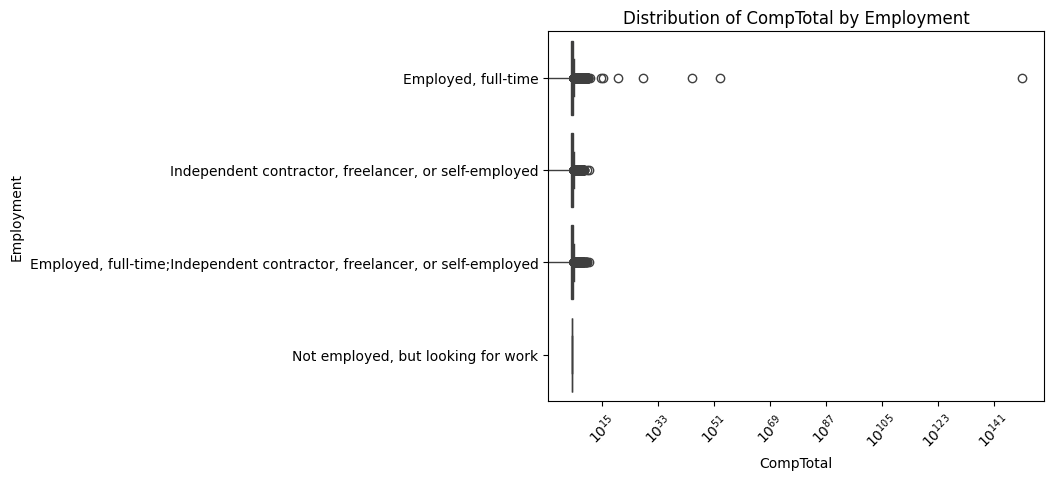

In [22]:
cols = ['CompTotal', 'Employment']
df_box = df[df['Employment'].isin(top_emp)] # filter top 5 dev types
df_box = df_box[cols].dropna().reset_index(drop=True)

sns.boxplot(x='CompTotal', y='Employment', data=df_box)
plt.title('Distribution of CompTotal by Employment')
plt.xlabel('CompTotal')
plt.ylabel('Employment')
plt.xticks(rotation=45)
plt.xscale('log')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [23]:
df['YearsCodePro'].unique()

array([nan, 17., 27.,  7., 11., 25., 12., 10.,  3., 18., 37., 15., 20.,
        6.,  2., 16.,  8., 14.,  4., 45.,  1., 24., 29.,  5., 30., 26.,
        9., 33., 13., 35., 23., 22., 31., 19., 21., 28., 34., 32., 40.,
       50., 39., 44., 42., 41., 36., 38., 51., 43., 47., 48., 46., 49.])

In [24]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'].unique()

array([nan, 17., 27.,  7., 11., 25., 12., 10.,  3., 18., 37., 15., 20.,
        6.,  2., 16.,  8., 14.,  4., 45.,  1., 24., 29.,  5., 30., 26.,
        9., 33., 13., 35., 23., 22., 31., 19., 21., 28., 34., 32., 40.,
       50., 39., 44., 42., 41., 36., 38., 51., 43., 47., 48., 46., 49.])

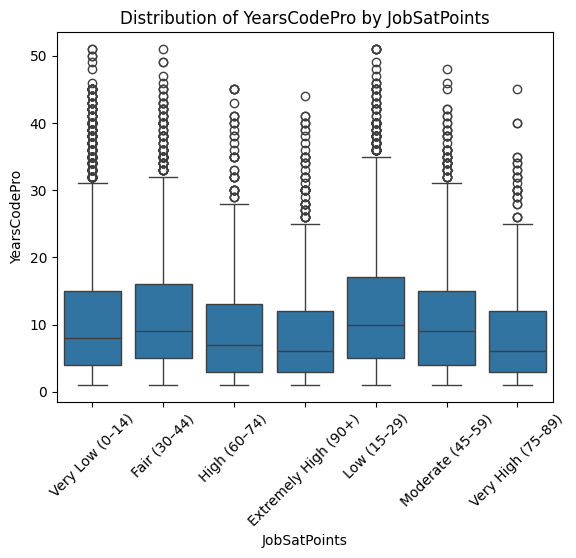

In [25]:
cols = ['YearsCodePro', 'JobSatPoints_6_Level']
df_box = df[cols].dropna().reset_index(drop=True)

sns.boxplot(x='JobSatPoints_6_Level', y='YearsCodePro', data=df_box)
plt.title('Distribution of YearsCodePro by JobSatPoints')
plt.xlabel('JobSatPoints')
plt.ylabel('YearsCodePro')
plt.xticks(rotation=45)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [26]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
